In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

{0: [1, 2], 1: [6, 5], 6: [7], 7: [9], 9: [4], 5: [3], 3: [8], 8: [9]}


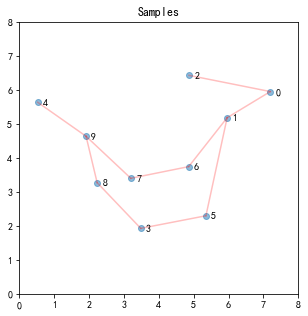

In [2]:
np.random.seed(43134)
x = np.random.rand(10, 2) * 5  + 1.5
x[0] += np.array([1, 0.5])
x[4] += np.array([-1, 1])

# 创建路线
graph = dict()
graph[0] = [1,2]
graph[1] = [6,5]
graph[6] = [7]
graph[7] = [9]
graph[9] = [4]
graph[5] = [3]
graph[3] = [8]
graph[8] = [9]
# graph[2] = [4]
print(graph)

# 地图线
plt.figure(figsize=(5, 5))
plt.title("Samples")
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)

for k, vs in graph.items():
    for v in vs:
        x1,y1 = x[k]
        x2,y2 = x[v]
        plt.plot([x1, x2], [y1, y2], 'r-', alpha=0.25)

for i in range(len(x)):
    x1, y1 = x[i]
    plt.annotate(i, xy=(x1, y1), xytext=(x1+0.15, y1-0.1))

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

In [3]:
# 构建距离矩阵
n = len(x)
dis_map = np.zeros((n, n)) + np.inf
for i in range(n):
    dis_map[i][i] = 0

# 各点之间的距离矩阵
for k, vs in graph.items():
    for v in vs:
        x1,y1 = x[k]
        x2,y2 = x[v]
        dis = np.sqrt(np.power(x1-x2, 2) + np.power(y1-y2, 2))
        dis_map[k, v] = dis_map[v][k] = dis  

start = 0 # 起点
nodes = [i for i in range(n)]
paths = [start] # 已访问路径
cands = [i for i in range(n) if i not in paths] # 未访问的路径
visit = [False for i in range(n)] # 访问标记
visit[start] = True
disls = dis_map[start] # 起点到其余各点的距离
lnkls = [[start, i] for i in range(n)]

# print(f"start = {start}")
# print(f"nodes = {nodes}")
# print(f"paths = {paths}")
# print(f"cands = {cands}")
# print(f"visit = {visit}")
# print(f"disls = {disls}")
# print(f"lnkls = {lnkls}")

def dijkstra():
    while len(cands)>0:    
        # 先从还未访问的节点集合cands中，【贪心】选一个当前可达到的最近节点k
        k = None
        dis = np.inf
        for i in cands:
            if disls[i] <= dis:
                k = i 
                dis = disls[i] 
        paths.append(k) # 将这个节点k增加到已访问路径（当前已找到最优路径的节点）
        cands.remove(k) # 将这个节点k从未访问的集合中剔除
        visit[i] = True # 标记节点的访问状态（没什么用，可删除）
        # 遍历cands的其他节点j，如果用k作为中介可以缩短(start,j)之间的距离，则用(start,k)+j的形式修改路径，并修改disls[j]的距离
        for j in cands: 
            if dis_map[start][k] + dis_map[k][j] < disls[j]: #【动态规划】的转移矩阵
                disls[j] = dis_map[start][k] + dis_map[k][j]  # 修改最短路径距离，需要用到邻接矩阵dis_map
                lnkls[j] = lnkls[k] + [j]  # 修改路径，用k作为中介点，用(stark,k)+(j)连接到j
    return 

dijkstra()

([0, 0], 0.0)
([0, 1], 1.4571179270728054)
([0, 2], 2.3796749082696893)
([0, 1, 5, 3], 6.311014886672594)
([0, 1, 6, 7, 9, 4], 8.460042609983985)
([0, 1, 5], 4.406218061407023)
([0, 1, 6], 3.270471455366794)
([0, 1, 6, 7], 4.964303581525024)
([0, 1, 6, 7, 9, 8], 8.148873389325786)
([0, 1, 6, 7, 9], 6.747488867292059)


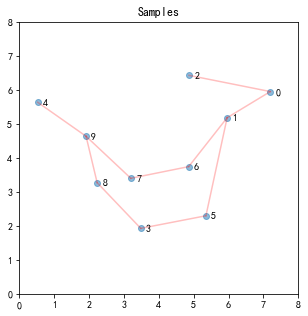

In [4]:
for i in zip(lnkls, disls):
    print(i)

# 地图线
plt.figure(figsize=(5, 5))
plt.title("Samples")
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)

for k, vs in graph.items():
    for v in vs:
        x1,y1 = x[k]
        x2,y2 = x[v]
        plt.plot([x1, x2], [y1, y2], 'r-', alpha=0.25)

for i in range(len(x)):
    x1, y1 = x[i]
    plt.annotate(i, xy=(x1, y1), xytext=(x1+0.15, y1-0.1))

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()